In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "../input/fer2013/train" # Directory containing the training data
test_dir = "../input/fer2013/test"  # Directory containing the validation data

In [3]:
# First, set up the data generators
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [4]:

# Set up the generators with shuffle=True
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training",
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation",
    shuffle=True
)


Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [5]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf 
from tensorflow.keras.layers import (
    Dense, 
    Dropout, 
    Flatten,
    Conv2D, 
    MaxPooling2D,
    BatchNormalization
)


# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Changed from lr to learning_rate
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 5, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,178,071 (15.94 MB)

 Trainable params: 1,391,943 (5.31 MB)

 Non-trainable params: 2,240 (8.75 KB)

 Optimizer params: 2,783,888 (10.62 MB)

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Define callbacks
checkpoint_callback = ModelCheckpoint(
    filepath='model.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model with callbacks
# Note: Remove steps_per_epoch and validation_steps
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, reduce_lr, early_stopping],
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.1751 - loss: 2.9379
Epoch 1: val_accuracy improved from -inf to 0.23883, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 100s 239ms/step - accuracy: 0.1751 - loss: 2.9375 - val_accuracy: 0.2388 - val_loss: 1.8698 - learning_rate: 1.0000e-04
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2206 - loss: 2.4789
Epoch 2: val_accuracy improved from 0.23883 to 0.32612, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.2207 - loss: 2.4787 - val_accuracy: 0.3261 - val_loss: 1.7729 - learning_rate: 1.0000e-04
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2612 - loss: 2.2282
Epoch 3: val_accuracy improved from 0.32612 to 0.34497, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 79ms/step - accuracy: 0.2612 - loss: 2.2281 - val_accuracy: 0.3450 - val_loss: 1.7294 - learning_rate: 1.0000e-04
Epoch 4/50
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s

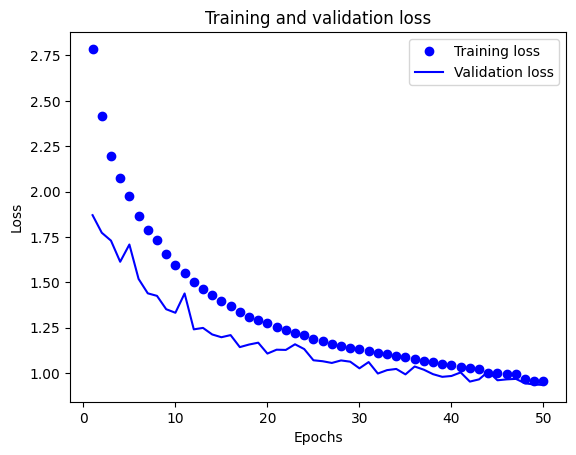

In [8]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

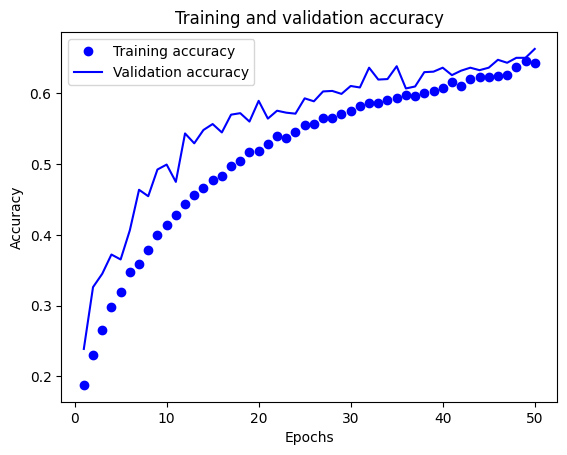

In [9]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


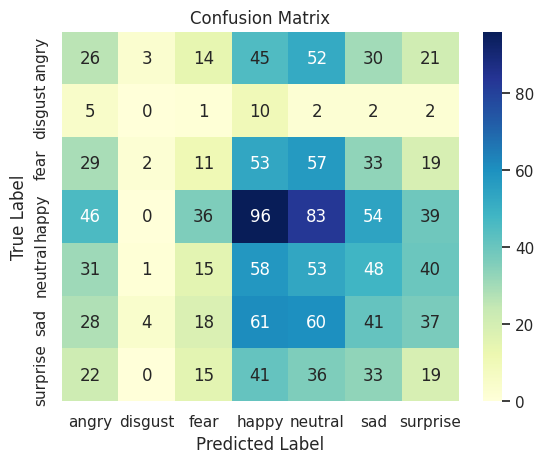

In [12]:
import numpy as np
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, validation_pred_labels,
                          target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14       191
     disgust       0.00      0.00      0.00        22
        fear       0.10      0.05      0.07       204
       happy       0.26      0.27      0.27       354
     neutral       0.15      0.22      0.18       246
         sad       0.17      0.16      0.17       249
    surprise       0.11      0.11      0.11       166

    accuracy                           0.17      1432
   macro avg       0.13      0.14      0.13      1432
weighted avg       0.17      0.17      0.17      1432



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step


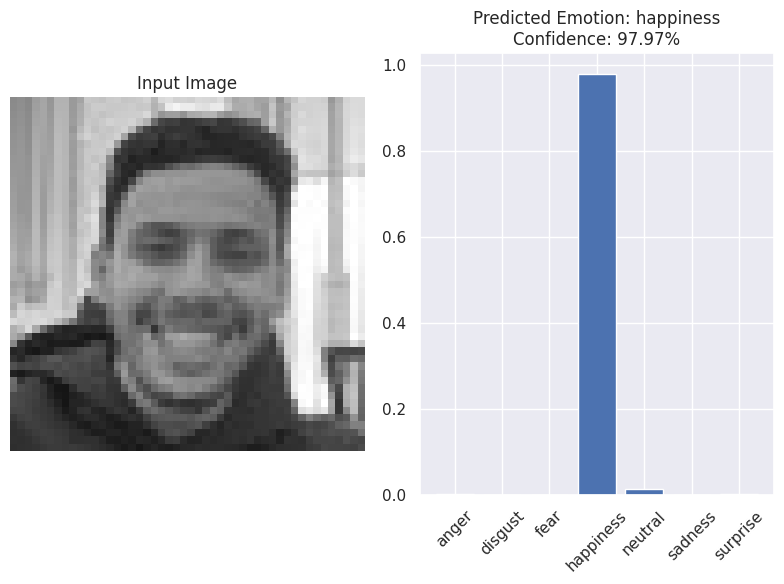

In [14]:
def predict_emotion(image_path):
    from tensorflow.keras.preprocessing import image
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Load and preprocess the image
    img = image.load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Make prediction
    prediction = model.predict(img_array)
    emotion_labels = ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    
    # Display the image and prediction
    plt.figure(figsize=(8, 6))
    
    # Display original image
    plt.subplot(1, 2, 1)
    display_img = image.load_img(image_path, target_size=(48, 48))
    plt.imshow(display_img)
    plt.axis('off')
    plt.title('Input Image')
    
    # Display prediction probabilities
    plt.subplot(1, 2, 2)
    plt.bar(emotion_labels, prediction[0])
    plt.xticks(rotation=45)
    plt.title(f'Predicted Emotion: {predicted_emotion}\nConfidence: {np.max(prediction[0]):.2%}')
    
    plt.tight_layout()
    plt.show()
    
    return predicted_emotion, prediction[0]

# Use the function
emotion, probabilities = predict_emotion('/kaggle/input/2-data/image1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


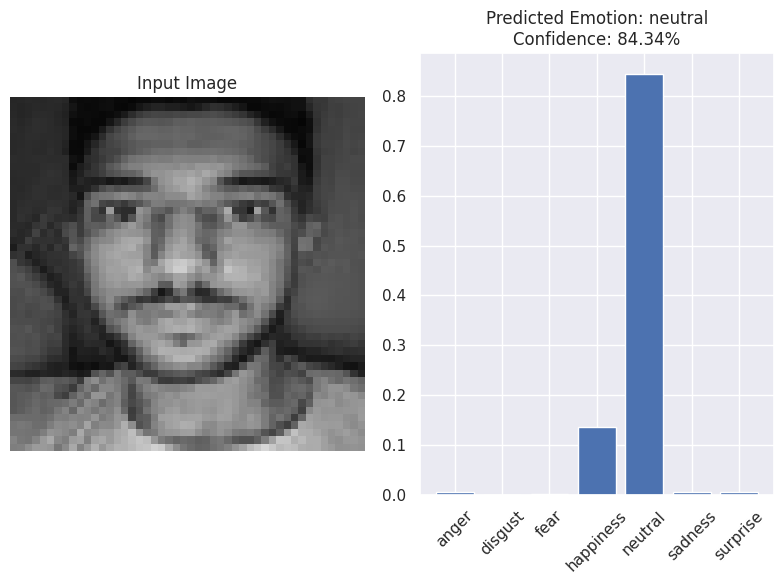

In [15]:
def predict_emotion(image_path):
    from tensorflow.keras.preprocessing import image
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Load and preprocess the image
    img = image.load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Make prediction
    prediction = model.predict(img_array)
    emotion_labels = ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    
    # Display the image and prediction
    plt.figure(figsize=(8, 6))
    
    # Display original image
    plt.subplot(1, 2, 1)
    display_img = image.load_img(image_path, target_size=(48, 48))
    plt.imshow(display_img)
    plt.axis('off')
    plt.title('Input Image')
    
    # Display prediction probabilities
    plt.subplot(1, 2, 2)
    plt.bar(emotion_labels, prediction[0])
    plt.xticks(rotation=45)
    plt.title(f'Predicted Emotion: {predicted_emotion}\nConfidence: {np.max(prediction[0]):.2%}')
    
    plt.tight_layout()
    plt.show()
    
    return predicted_emotion, prediction[0]

# Use the function
emotion, probabilities = predict_emotion('/kaggle/input/2-data/image2.jpg')

In [20]:
model.save('Best_model.keras')